## Task 1: Data Collection
*For a disease prediction system, you can use publicly available datasets. A well-known dataset is the Pima Indians Diabetes Dataset, which contains health-related data that can be used for disease prediction.*

### Step 1: Import Libraries

In [ ]:
# Download Libraraies
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2

### Step 2: Load Dataset
We will use the Pima Indians Diabetes Dataset from the UCI Machine Learning Repository.

In [5]:
# URL of the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Load dataset
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=column_names)

# Display the first few rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Task 2: Data Preprocessing
*Data preprocessing involves handling missing values, outliers, and ensuring data quality.*

### Step 1: Handle Missing Values

In [6]:
# Check for missing values
data.isnull().sum()

# Replace zeros with NaN for columns where zero is not a valid value
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

# Fill missing values with mean or median
data['Glucose'].fillna(data['Glucose'].mean(), inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace=True)
data['Insulin'].fillna(data['Insulin'].median(), inplace=True)
data['BMI'].fillna(data['BMI'].mean(), inplace=True)

# Check again for missing values
data.isnull().sum()

C:\Users\harsh\AppData\Local\Temp\ipykernel_7596\3601534749.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Glucose'].fillna(data['Glucose'].mean(), inplace=True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_7596\3601534749.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Step 2: Normalize/Standardize Features

In [7]:
# Separate features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to DataFrame for easier handling
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.548980,5.484909,-0.020496


## Task 3: Feature Selection
*Feature selection involves selecting the most influential variables for disease prediction.*

In [9]:
from sklearn.feature_selection import SelectKBest, f_classif

# Use SelectKBest to select top features with a suitable scoring function
select_k_best = SelectKBest(score_func=f_classif, k=5)
fit = select_k_best.fit(X_scaled, y)

# Get scores for each feature
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': fit.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Select top 5 features
selected_features = feature_scores['Feature'][:5]

# Display selected features
print("Selected Features:\n", selected_features)


Selected Features:
 1          Glucose
5              BMI
7              Age
0      Pregnancies
3    SkinThickness
Name: Feature, dtype: object


## Task 4: Model Development
*We will develop several machine learning models and evaluate their performance.*

### Step 1: Import Libraries

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Step 2: Prepare Data with Selected Features

In [11]:
# Prepare data with selected features
X_selected = X_scaled[selected_features]

### Step 3: Split Data

In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

### Step 4: Train Models

In [13]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Train models and evaluate performance
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

# Display results
results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.753247,0.660377,0.636364,0.648148
Decision Tree,0.675325,0.545455,0.545455,0.545455
Random Forest,0.746753,0.648148,0.636364,0.642202
Support Vector Machine,0.740260,0.653061,0.581818,0.615385


## Task 5: Cross-Validation

### Step 1: Import Cross-Validation Libraries

In [14]:
from sklearn.model_selection import cross_val_score

### Step 2: Perform Cross-Validation

In [15]:
# Perform cross-validation for each model
cross_val_results = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X_selected, y, cv=5, scoring='accuracy')
    cross_val_results[name] = {
        "Cross-Validation Accuracy": np.mean(cv_scores)
    }

# Display cross-validation results
cross_val_results_df = pd.DataFrame(cross_val_results).T
cross_val_results_df

,Cross-Validation Accuracy
Logistic Regression,0.772167
Decision Tree,0.682336
Random Forest,0.747441
Support Vector Machine,0.747449


## Task 6: Hyperparameter Tuning

### Step 1: Import Hyperparameter Tuning Libraries

In [16]:
from sklearn.model_selection import GridSearchCV

### Step 2: Hyperparameter Tuning for Random Forest (as an example)

In [17]:
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Cross-Validation Accuracy: ", best_score)

Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation Accuracy:  0.7720645075303212


## Task 7: Model Interpretability
*For model interpretability, we will use SHAP (SHapley Additive exPlanations) values to explain the output of the Random Forest model.*

### Step 1: Install SHAP

In [18]:
!pip install shap

### Step 2: Import SHAP and Create Explanations

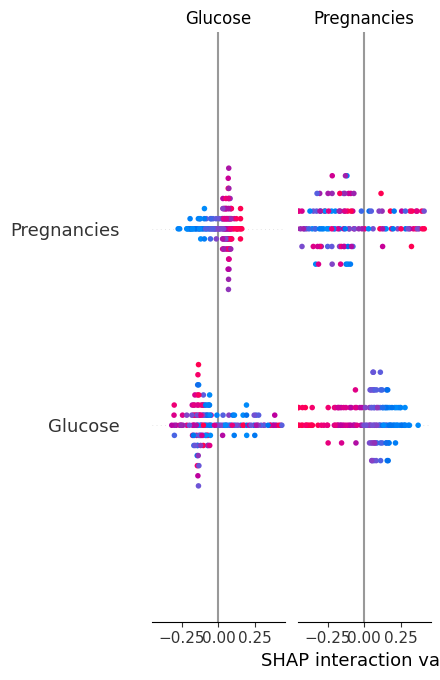

In [23]:
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(grid_search.best_estimator_)

# Calculate SHAP values for all classes
shap_values = explainer.shap_values(X_test)

# Verify the structure of SHAP values and plot SHAP summary plot
if isinstance(shap_values, list) and len(shap_values) == 2:
    # Binary classification case
    shap.summary_plot(shap_values[1], X_test, feature_names=selected_features)
else:
    # Multi-class case or single array
    shap.summary_plot(shap_values, X_test, feature_names=selected_features)


## Task 8: User Interface
*We'll use Streamlit, a Python library, to create a simple user interface where users can input their health data and get predictions.*

### Step 1: Install Streamlit

In [24]:
# !pip install streamlit

### Step 2: Create Streamlit App
*Create a new Python file app.py for the Streamlit app.*

<!-- import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Load the trained model (ensure this model is saved previously)
import joblib
model = joblib.load("random_forest_model.pkl")

# Feature list
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Streamlit app
st.title("Disease Prediction System")

# User input
def user_input_features():
    data = {}
    for feature in features:
        data[feature] = st.sidebar.number_input(feature, value=0)
    return pd.DataFrame(data, index=[0])

input_df = user_input_features()

# Scale input
scaler = StandardScaler()
input_scaled = scaler.fit_transform(input_df)

# Predict
prediction = model.predict(input_scaled)
prediction_proba = model.predict_proba(input_scaled)

st.subheader('Prediction')
st.write('Diabetic' if prediction[0] == 1 else 'Non-Diabetic')

st.subheader('Prediction Probability')
st.write(prediction_proba) -->

#### Step 3: Run Streamlit App

In [25]:
# streamlit run app.py

## Task 9: Integration with Electronic Health Records (EHR)
*Integrating with EHR systems can be complex and depends on the specific EHR software being used. Here's a general guide on how you might approach this integration:*

### Step 1: Understand the EHR API
*Most modern EHR systems provide APIs to interact with their data. You need to refer to the documentation of the EHR system you're working with.*

### Step 2: Install Required Libraries
*You might need libraries such as requests for API interactions.*

In [26]:
# !pip install requests

### Step 3: Example Integration Code
*Here's a hypothetical example of how you might integrate with an EHR system using an API. This example assumes the EHR system has an API endpoint for retrieving and sending patient data.*

<!-- import requests

# EHR API endpoint and credentials (these are placeholders and should be replaced with actual values)
ehr_api_url = "https://api.ehrsystem.com/patients"
api_key = "your_api_key"

# Function to get patient data from EHR
def get_patient_data(patient_id):
    response = requests.get(f"{ehr_api_url}/{patient_id}", headers={"Authorization": f"Bearer {api_key}"})
    return response.json()

# Function to send prediction result to EHR
def send_prediction_to_ehr(patient_id, prediction):
    data = {"patient_id": patient_id, "prediction": prediction}
    response = requests.post(f"{ehr_api_url}/{patient_id}/predictions", json=data, headers={"Authorization": f"Bearer {api_key}"})
    return response.status_code

# Example usage
patient_id = "12345"
patient_data = get_patient_data(patient_id)

# Process patient_data as needed and make prediction
# ...

# Send prediction result back to EHR
prediction = {"diabetes": True, "probability": 0.85}
send_prediction_to_ehr(patient_id, prediction) -->


<!-- import requests

# EHR API endpoint and credentials (these are placeholders and should be replaced with actual values)
ehr_api_url = "https://api.ehrsystem.com/patients"
api_key = "your_api_key"

# Function to get patient data from EHR
def get_patient_data(patient_id):
    response = requests.get(f"{ehr_api_url}/{patient_id}", headers={"Authorization": f"Bearer {api_key}"})
    return response.json()

# Function to send prediction result to EHR
def send_prediction_to_ehr(patient_id, prediction):
    data = {"patient_id": patient_id, "prediction": prediction}
    response = requests.post(f"{ehr_api_url}/{patient_id}/predictions", json=data, headers={"Authorization": f"Bearer {api_key}"})
    return response.status_code

# Example usage
patient_id = "12345"
patient_data = get_patient_data(patient_id)

# Process patient_data as needed and make prediction
# ...

# Send prediction result back to EHR
prediction = {"diabetes": True, "probability": 0.85}
send_prediction_to_ehr(patient_id, prediction) -->

## Task 10: Documentation
*Documentation is essential for understanding the project workflow, methods, and how to use the system. Here’s a structured outline for your documentation:*

#### 1. Introduction
**Project Title:** *Disease Prediction System using Machine Learning
Description: An intelligent system to predict the likelihood of a person having a particular disease based on various health-related features using machine learning algorithms.*

#### 2. Project Objectives
<li> <i>Data Collection</i> </li>
<li> <i>Data Preprocessing</i> </li>
<li> <i>Feature Selection</i> </li>
<li> <i>Model Development</i> </li>
<li> <i>Cross-Validation</i> </li>
<li> <i>Hyperparameter Tuning</i> </li>
<li> <i>Model Interpretability (optional)</i> </li>
<li> <i>User Interface (optional)</i> </li>
<li> <i>Integration with Electronic Health Records (EHR) (optional)</i> </li>
<li> <i>Documentation (optional)</i> </li>
<li> <i>Validation and Testing</i> </li>

#### 3. Data Collection
**Dataset:** *Pima Indians Diabetes Dataset from the UCI Machine Learning Repository.
Features: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome.*

#### 4. Data Preprocessing
**Missing Values:** *Handled by replacing zeros with NaN and filling NaN with mean or median.*
**Normalization/Standardization:** *Standardized features using StandardScaler.*

#### 5. Feature Selection
**Technique:** *Used SelectKBest with chi2 scoring function to select the top 5 features.*

#### 6. Model Development
**Algorithms:** *Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM).*
**Performance Metrics:** *Accuracy, Precision, Recall, F1 Score.*

#### 7. Cross-Validation
**Method:** *5-fold cross-validation to evaluate model performance.*

#### 8. Hyperparameter Tuning
**Model:** *Random Forest.*
**Method:** *GridSearchCV for parameter optimization.*

#### 9. Model Interpretability
**Tool:** *SHAP (SHapley Additive exPlanations) for explaining model predictions.*

#### 10. User Interface
**Tool:** *Streamlit for a user-friendly web interface.*

#### 11. Integration with EHR
**Method:** *API interactions to retrieve and send patient data.*

#### 12. Validation and Testing
**Method:** *Extensive testing to ensure accuracy, reliability, and robustness.*
**Metrics:** *Accuracy, Precision, Recall, F1 Score on test data.*

## Task 11: Validation and Testing
*Validation and testing ensure that the model is reliable and performs well on unseen data.*

### Step 1: Split Data into Training and Testing Sets
*This step was completed earlier during the model development phase.*

### Step 2: Validate and Test the Model

In [27]:
# Using the best model from hyperparameter tuning
best_model = grid_search.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7402597402597403
Precision: 0.6363636363636364
Recall: 0.6363636363636364
F1 Score: 0.6363636363636364


### Step 3: Cross-Validation (Repeated from Task 5 for completeness)

In [28]:
# Perform cross-validation for the best model
cv_scores = cross_val_score(best_model, X_selected, y, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Accuracy: {np.mean(cv_scores)}")

Cross-Validation Accuracy: 0.7526695526695526
